<h4>Ejemplo -1</h4>

In [1]:
NR0 = RealField(prec=2048)

In [2]:
NR0(pi)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145264

In [3]:
C = str(NR0(pi))

In [4]:
len(C)

617

In [5]:
C[:2]

'3.'

In [6]:
(2048/(617-1)).n() #bits por cifra en promedio

3.32467532467532

In [7]:
N(pi,digits=616)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145264

<h4>Ejemplo 0</h4>

In [8]:
1.1+1.1+1.1==3.3 #No son iguales ¿Por qué?

False

In [9]:
bool(1.1+1.1+1.1==3.3+0.0)

False

In [10]:
type(1.1+1.1+1.1)==type(3.3+0.0)

True

In [11]:
1.1+1.1+1.1-3.3

4.44089209850063e-16

<p>Debido a los errores de redondeo, $1.1+1.1+1.1-3.3 $ resulta ser, para el ordenador, &nbsp;del orden de $4\cdot 10^{-16}$ y, por tanto no es cero. Cuando preguntamos a SAGE si dos enteros o racionales son iguales la respuesta es fiable, si en cambio son decimales NO.</p>

In [12]:
R = RealField(2048)

In [13]:
R(1.1+1.1+1.1-3.3)

4.440892098500626161694526672363281250000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000e-16

<p>Aunque aumentemos &nbsp;la precisi&oacute;n se obtiene la misma respuesta. Sin embargo:</p>

In [14]:
R(1.1+1.1+1.1+1.1-4.4);R(1.1+1.1+1.1+1.1)==R(4.4);1.1+1.1+1.1+1.1==4.4

True

<p>En este otro c&aacute;lculo no se producen errores de redondeo y la respuesta es, m&aacute;s o menos, &nbsp;"correcta". &iquest;A qu&eacute; se puede deber que primero responde $False$ y despu&eacute;s $True$?</p>

<h4>Ejemplo 1</h4>

In [15]:
NR = RealField(prec=30)

In [16]:
f(x)=(1-cos(x))/x^2

/usr/lib/sagemath/local/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


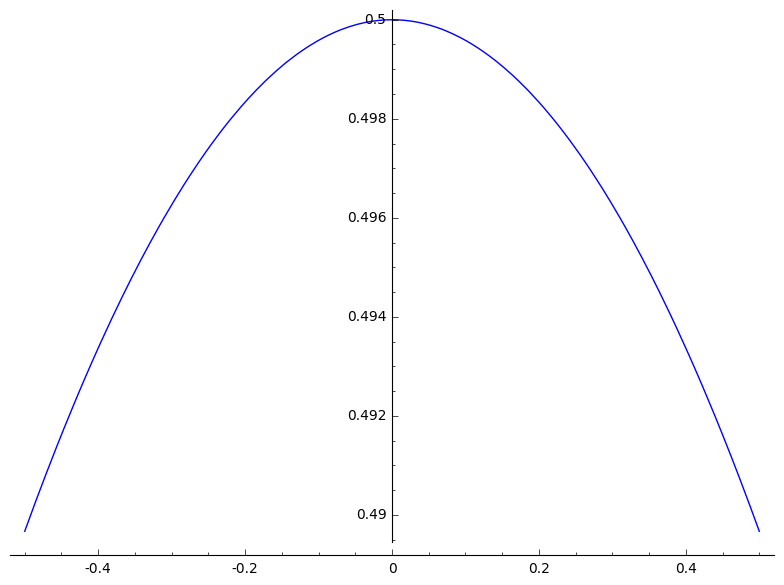

In [17]:
plot(f,-0.5,0.5)

In [18]:
taylor(f,x,0,5)

x |--> 1/720*x^4 - 1/24*x^2 + 1/2

In [19]:
g(x) = cos(x)

In [20]:
g(x=NR(1.2*10^(-5)))

1.0000000

<p>Como, con $prec=30$, el $cos(1.2*10^{-5})$ vale $1.0000000$ el valor de $f(1.2*10^{-5})$ sale cero con un error enorme.</p>

In [21]:
V = f(x=NR(1.2*10^(-5)));V

-0.00000000

In [22]:
NR1 = RealField(prec=40)

In [23]:
f(x=NR1(1.2*10^(-5)))

0.49895889889

In [24]:
NR2 = RealField(prec=56)

In [25]:
f(x=NR2(1.2*10^(-5)))

0.5000000220954802

In [26]:
NR3 = RealField(prec=1024)

In [27]:
V1 = f(x=NR3(1.2*10^(-5)));V1

0.4999999999940000000000287996959896367808401946049893137272434253999345548870214160533317730845617285722502432223786603796647722494314281106550122486419291139762883177187870625828619182166257891515121223486872565303968357493572184046760153971092244692489670753101321308165196129357616023322554642414879821846

<p>Vemos que con $prec=40$ son correctas dos de las cifras decimales, aumentando a $prec=56$ se pierden las dos cifras correctas y pas&aacute;ndose con $prec=1024$ se vuelve a obtener un resultado menor que $1/2$, no es dif&iacute;cil demostrar que $f(x)&lt;1/2$ para $x\ne 0$, que deber&iacute;a tener bastantes cifras&nbsp; decimales&nbsp; correctas. El error que se produce&nbsp; en $V$ se llama de "cancelaci&oacute;n" , y se define como un error enorme que aparece al restar dos cantidades muy pr&oacute;ximas que s&oacute;lo difieren en cifras m&aacute;s all&aacute; de la precisi&oacute;n que estamos usando en el c&aacute;lculo.</p>

In [28]:
NR4 = RealField(prec=2048)

In [29]:
V2 = f(x=NR4(1.2*10^(-5)));V2

0.4999999999940000000000287996959896367808401946049893137272434253999345548870214160533317730845617285722502432223786603796647722494314281106550122486419291139762883177187870625828619182166257891515121223486872565303968357493572184046760153971092244692489670753101321308165196129357616023322554642414870456418543638973129377268343117471789823088189449541231129087592748968562522092878449769309652637472158867643382603013683636349597161832640383334439630293346195460796416860554034393996820351981332104220873571808970953714644046636865487171353767152907515793470337839573319942150988595039681068818739774665119878135721

<p>Al aumentar la precisi&oacute;n a $prec=2048$ s&oacute;lo las &uacute;ltimas $7$ cifras decimales de $V1$ no se mantienen. El error que se produce en esas &uacute;ltimas $7$ cifras de $V1$&nbsp; es el inherente al c&aacute;lculo con decimales aproximados ("error de redondeo") y es inevitable.&nbsp; Los errores de cancelaci&oacute;n, en general, se pueden evitar aumentando la precisi&oacute;n pero los de redondeo son inevitables y debemos tratar de mantenerlos controlados. </p>

<h4>Ejemplo 2</h4>

<p>Otro ejemplo de cancelaci&oacute;n, ahora en el c&aacute;lculo de las ra&iacute;ces de una ecuaci&oacute;n de segundo grado:</p>

In [30]:
f(x)=(10^(-20))*x^2-3*10^(20)*x+2*10^(20)

In [31]:
sols = solve(f,x,solution_dict=True);sols

[{x: -100000000000000000000*sqrt(22499999999999999999999999999999999999998) + 15000000000000000000000000000000000000000},
 {x: 100000000000000000000*sqrt(22499999999999999999999999999999999999998) + 15000000000000000000000000000000000000000}]

In [32]:
for sol in sols:
    print sol[x].n(digits=10)

0.0000000000
3.000000000e40


In [33]:
for sol in sols:
    print sol[x].n(digits=20)

0.00000000000000000000
3.0000000000000000000e40


In [34]:
for sol in sols:
    print sol[x].n(digits=40)

0.6250000000000000000000000000000000000000
3.000000000000000000000000000000000000000e40


In [35]:
for sol in sols:
    print sol[x].n(digits=50)

0.66666666667151730507612228393554687500000000000000
2.9999999999999999999999999999999999999999333333333e40


<h4>Ejemplo 3</h4>
<p>De la misma forma en que podemos obtener cancelaciones cuando una diferencia es muy pr&oacute;xima a $0$, podemos obtenerlas cuando multiplicamos por cantidades muy pr&oacute;ximas a $1$, que la m&aacute;quina toma como $1$:</p>

In [36]:
def prueba(x,k):
    for muda in srange(k):
      x = sqrt(x)
    for muda in srange(k):
      x = x*x
    return x

In [37]:
[prueba(100.0,10*k) for k in srange(1,8)]

[100.000000000006,
 100.000000011555,
 99.9999770096763,
 99.9810245754440,
 90.0171269377680,
 1.00000000000000,
 1.00000000000000]

In [38]:
NR7 = RealField(prec=128)

In [39]:
def prueba2(x,k):
    for muda in srange(k):
      x = NR7(sqrt(x))
    for muda in srange(k):
      x = NR7(x*x)
    return x

In [40]:
[prueba2(100.0,10*k) for k in srange(1,8)]

[99.999999999999999999999999999999999915,
 100.00000000000000000000000000000000360,
 99.999999999999999999999999999984601618,
 99.999999999999999999999999700849351586,
 100.00000000000000000000019874119658729,
 100.00000000000000000018416370944114861,
 99.999999999999999698640434507180424762]

<p>Vemos que tambi&eacute;n en este caso aumentando la precisi&oacute;n se resuelve el problema.</p>

<h4>Ejemplo 7</h4>

<p>En c&aacute;lculos en &nbsp;&Aacute;lgebra Lineal num&eacute;rica (&Aacute;lgebra Lineal con datos decimales) &nbsp;se encuentran con cierta frecuencia problemas de "inestabilidad": peque&ntilde;os cambios en los datos producen cambios muy grandes en la soluci&oacute;n calculada.</p>

In [41]:
def hilbert_m(n):
    A = matrix(RR,n,n,[0]*n^2)
    for fila in srange(n):
        for columna in srange(n):
            A[fila,columna]=(1/(fila+columna+1)).n()
    return A

In [42]:
M = hilbert_m(5);M

[ 1.00000000000000 0.500000000000000 0.333333333333333 0.250000000000000 0.200000000000000]
[0.500000000000000 0.333333333333333 0.250000000000000 0.200000000000000 0.166666666666667]
[0.333333333333333 0.250000000000000 0.200000000000000 0.166666666666667 0.142857142857143]
[0.250000000000000 0.200000000000000 0.166666666666667 0.142857142857143 0.125000000000000]
[0.200000000000000 0.166666666666667 0.142857142857143 0.125000000000000 0.111111111111111]

In [43]:
b = M*vector([1,1,1,1,1]);b

(2.28333333333333, 1.45000000000000, 1.09285714285714, 0.884523809523809,
0.745634920634921)

In [44]:
M.solve_right(b)

(0.999999999999984, 1.00000000000015, 0.999999999999717, 1.00000000000002,
1.00000000000013)

<p>Resolvemos el sistema con matriz $M$ y vector de t&eacute;rminos independientes $b=M\cdot(1,1,1,1,1)^t$. La soluci&oacute;n, como esperar&iacute;amos, es aproximadamente $(1,1,1,1,1)^t$. Perturbamos ligeramente el elemento $M[4,0]$ de $M$</p>

In [45]:
M[4,0]

0.200000000000000

In [46]:
M[4,0] += 10^(-5)

In [47]:
M[4,0]

0.200010000000000

In [48]:
M.solve_right(b)

(0.993739441518408, 1.12521116963169, 0.436549736657753, 1.87647818742091,
0.561760906289674)

<p>Ahora la soluci&oacute;n difiere mucho de&nbsp;$(1,1,1,1,1)^t$. Por supuesto, SAGE puede hacer este c&aacute;lculo de manera exacta usando el cuerpo $QQ$ de los n&uacute;meros racionales en lugar de $RR$.</p>